##**Programação e Algoritmos II**

Prof. Alexandre Levada

###**Busca em Grafos**

Relevância: como navegar em grafos de maneira determinística percorrendo um conjunto de dados não estruturado.

Objetivo: acessar/recuperar unicamente todos os elementos do conjunto V

Questões: De quantas maneiras podemos fazer isso? Como? Qual a melhor maneira?

**Relação entre busca em grafos e árvores**

Buscar elementos num grafo G consiste basicamente no processo de extrair uma árvore T a partir de G. Mas porque?

Sabe-se que árvores são grafos acíclicos e conexos.

Sendo assim, pode-se mostrar que, um grafo G é uma árvore se e somente se existe um único caminho entre qualquer par de vértices. Isso significa que em árvores com uma raiz r definida, caminhos de r até os demais vértices são índices únicos para os elementos do conjunto!

Portanto, dado um grafo G, extrair uma árvore T com raiz r a partir dele, significa indexar unicamente cada elemento do conjunto.

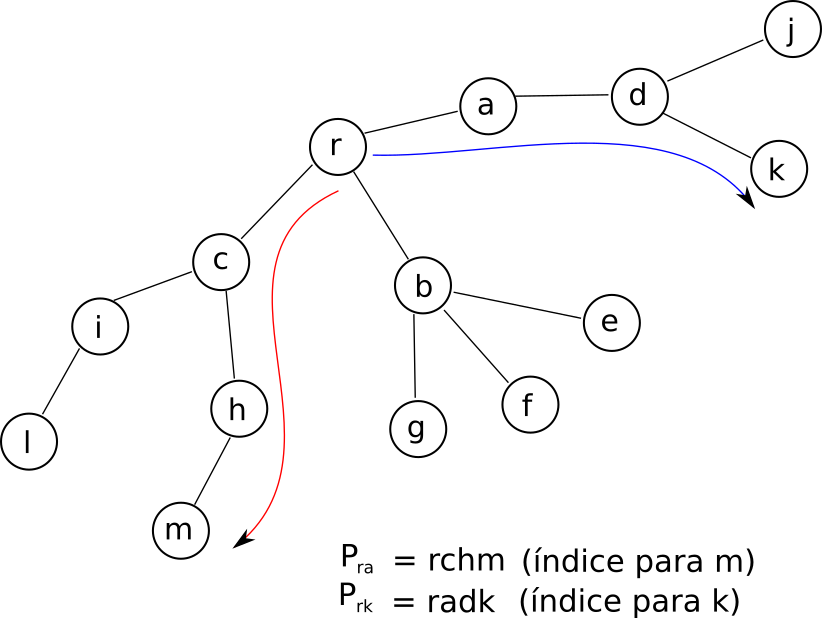

###**Busca em Largura (Breadth-First Search)**

A Busca em Largura obtém o menor caminho entre dois vértices de um grafo sob a hipótese de que todas as arestas possuem custo unitário.

A ideia geral da busca em largura consiste em inicialmente explorar todos os vértices que são vizinhos da raiz s. Na sequência, quando todos eles tiverem sido visitados, a Busca em Largura inicia a exploração dos vértices que estão no nível 2, ou seja, dos vizinhos dos vizinhos da raiz s. Esse processo continua até que todos os vértices do grafo tenhan sido visitados.

Antes de apresentarmos o algoritmo, iremos definir as principais variáveis utilizadas por ele.

Definição das variáveis (pseudo-código):

i) Q: Fila (FIFO) para gerenciar a ordem de acesso aos vértices

2 primitivas

    a) Dequeue (pop): remove elemento do início da fila

    b) Enqueue (push): adiciona um elemento no final da fila

ii) v.color : status do vértice v (existem 3 possíveis valores)

	a) WHITE: vértice v ainda não descoberto (significa que v ainda não entrou na fila Q)

	b) GRAY: vértice já descoberto (significa que v está na fila Q)

	c) BLACK: vértice finalizado (significa que v já saiu da fila Q)

iii) v.d (ou $\lambda(v)$): armazena a menor distância de v até a raiz s

iv) $v.π$ (ou $\pi(v)$): predecessor de v (onde eu estava quando descobri v)


**PSEUDOCÓDIGO**

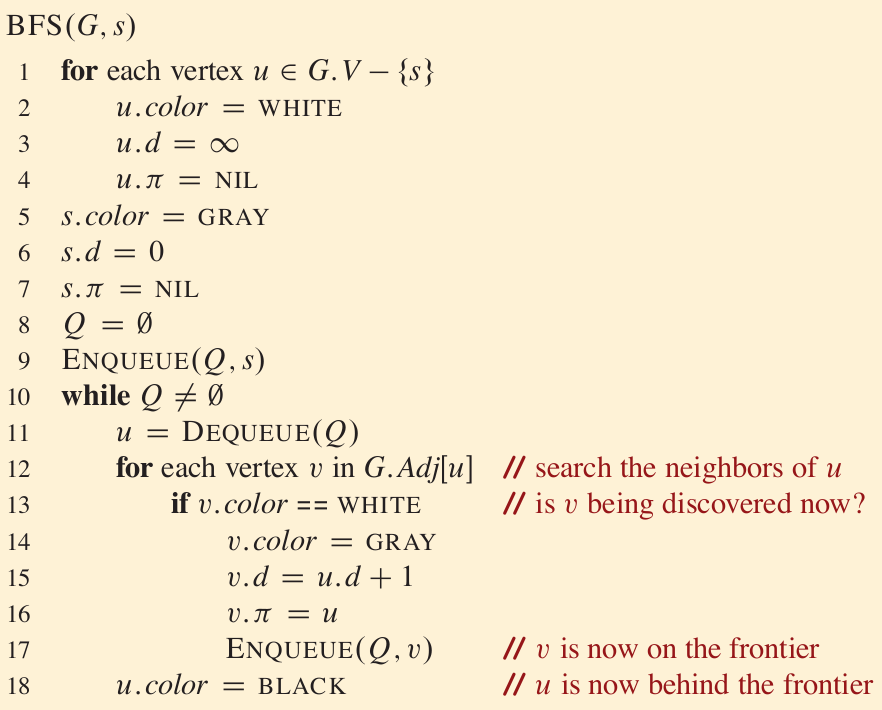


O algoritmo inicia com um loop para inicialização das variáveis. Para todo vértice diferente da raiz, o status (color) é setado como WHITE, a distância é infinito e não há um predecessor definido na árvore de busca em largura. Logo em seguida, como a distância da raiz s para ela mesma é zero, setamos s.d como 0. Como s será o único vértice a iniciar na fila Q, seu status (color) é setado como GRAY. Além disso, como s é a raiz, ele não possui predecessor. Finalmente, inserimos o vértice s (raiz) na fila Q.

O loop principal do algoritmo deve repetir até que a fila Q esteja totalmente vazia. No início de cada iteração, removemos o primeiro elemento u da fila Q (pois ele é o que entrou primeiro) e observamos todos os seus vizinhos v. Para cada um dos vizinhos, se é a primeira vez que passamos por aqui (descobrimos v agora, ou seja v.color == WHITE), então modificamos o status do vértice v para GRAY, atribuímos o valor da distância como a distância do vértice u mais um (pois ele está exatamente um nível abaixo de u), atualizamos o predecessor de v como u e adicionamos v no final da fila Q.

Ao sair do for interno ao loop while, significa que o vértice u não será mais utilizado no decorrer do algoritmo, uma vez que ele já saiu da fila Q. Sendo assim, setamos seu status como BLACK (finalizado).

Em resumo, esse algoritmo recebe um grafo não ponderado G e retorna uma árvore T, conhecida como BFS-tree. Essa árvore possui uma propriedade muito especial: ela armazena os menores caminhos da raíz s a todos os demais vértices de T. Para melhor compreender o funcionamento do algoritmo BFS, a seguir apresentamos um trace completo de sua execução manual para o grafo a seguir.

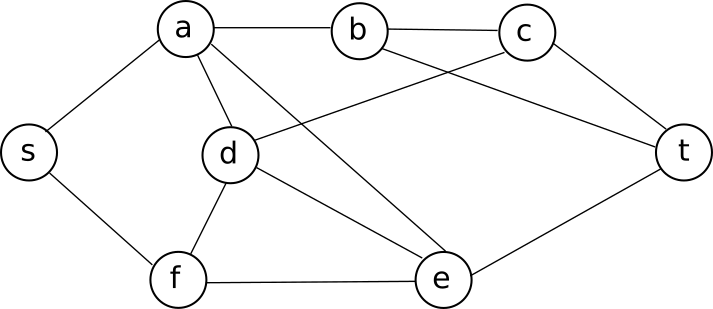

Explicação em vídeo: https://www.youtube.com/watch?v=4v9VcgXXO7Q&list=PL7OlISixQYm50wMkXCygCgymn1dVmc9sg&index=28

###**Trace do algoritmo BFS**

A seguir apresentamos um trace completo do algoritmo de Busca em Largura, onde na tabela a seguir, $\lambda(v)$ denota a distância do caminho mínimo da raiz s até o vértice v.

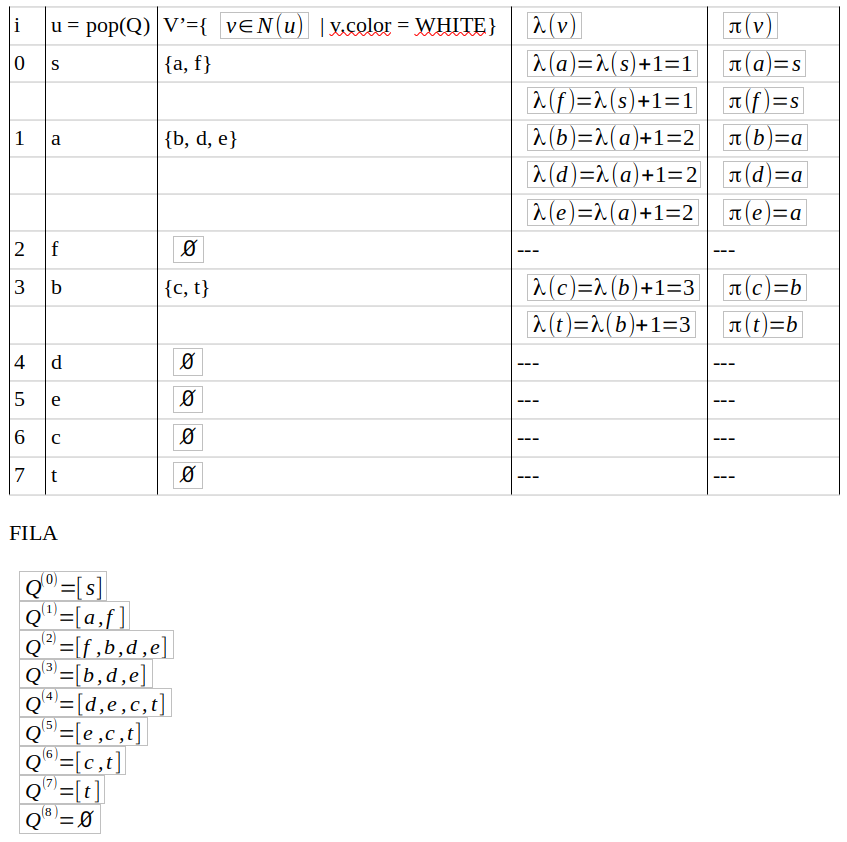

Explicação em vídeo: https://www.youtube.com/watch?v=cYuMpdVmvSQ&list=PL7OlISixQYm50wMkXCygCgymn1dVmc9sg&index=29

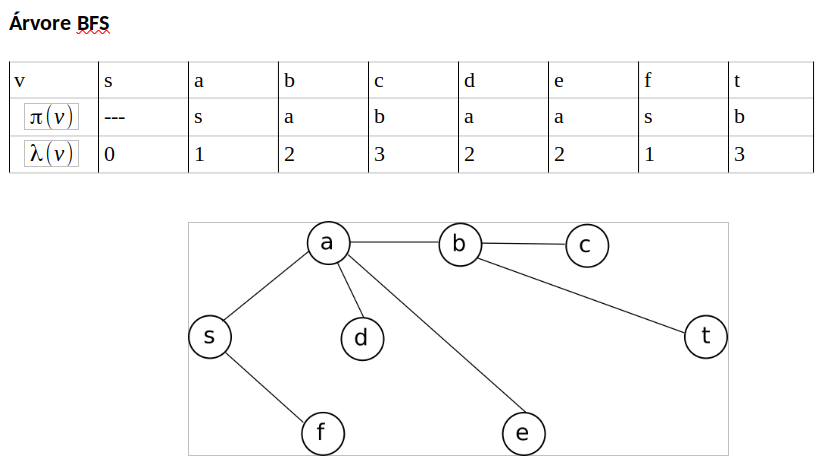

Note que a árvore nada mais é que a união dos caminhos mínimos de s (origem) a qualquer um dos vértices do grafo (destinos). A BFS-tree geralmente não é única, porém todas possuem a mesma profundidade (mínima distância da raiz ao mais distante).

A seguir demonstraremos um teorema fundamental que nos diz que a Busca em Largura é ótima no sentido de minimizar os caminhos sob a hipótese de que todas as arestas possuem o mesmo custo unitário.

**Teorema:** A BFS sempre termina com $\lambda(v) = d(s, v)$ para $\forall v \in V$, onde $d(s, v)$ é a distância geodésica (menor distância entre s e v).

Prova por contradição:

1. Sabemos que em qualquer ponto da BFS $\lambda(v) \geq d(s,v)$.

2. Suponha que $\exists v \in V$ tal que $\lambda(v) > d(s,v)$, onde v é o primeiro vértice que isso ocorre ao sair da fila Q.

3. Então, existe caminho $P_sv$ pois senão $\lambda(v) = d(s, v) = \infty$ (contradiz 2)

4. Se existe $P_{sv}$ então existe um caminho mínimo $P_{sv}^{*}$

5. Considere $u \in V$ como predecessor de v em $P_{sv}^{*}$

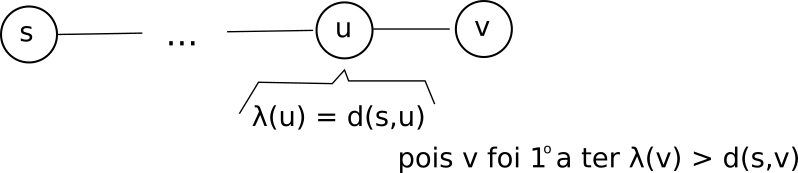



6. Então, $d(s,v) = d(s,u) + 1$ (pois u é predecessor de v)

7. Assim, combinando (2), (6) e (5) temos:

$$
\lambda(v) > d(s, v) = d(s, u) + 1 = \lambda(u) + 1
$$

e portanto $\lambda(v) > \lambda(u) + 1$ (*), o que é uma contradição pois só existem 3 possibilidades quando u sai da fila Q, ou seja, u = Dequeue(Q):

i) v é WHITE: $\lambda(v) = \lambda(u) + 1$ (contradição)

ii) v é BLACK: se isso ocorre significa que v sai da fila Q antes de u, ou seja, $\lambda(v) \leq \lambda(u)$ (contradição)

iii) v é GRAY: então v foi descoberto por um vértice w removido de Q antes de u, ou seja, $\lambda(w) \leq \lambda(u)$ (**). Além disso, $\lambda(v) = \lambda(w) + 1$. Assim, somando 1 de ambos os lados de (**) temos $\lambda(w) + 1 \leq \lambda(u) + 1$, o que finalmente implica em $\lambda(v) \leq \lambda(u) + 1$ (contradição)

Portanto, $\nexists v \in V$ tal que $\lambda(v)>d(s, v)$.

Explicação em vídeo: https://www.youtube.com/watch?v=k3QubZ_6xXQ&list=PL7OlISixQYm50wMkXCygCgymn1dVmc9sg&index=30

**Análise da complexidade da BFS**

Note que a etapa de inicialização tem complexidade $O(n)$, onde $n = |V|$. Dentro do loop while, que é executado n vezes (uma vez para cada vértice, temos:

a) u = Dequeue(Q): complexidade $O(1)$

b) u.color = BLACK: complexidade $O(1)$

c) o loop FOR é executado $d(u)$ vezes, onde $d(u)$ denota o grau do vértice u, ou seja, como iremos variar u dentre todos os vértices do grafo, temos $d(v_1) + d(v_2) + ... + d(v_n) = 2m$ (pelo Handshaking Lema, o somatório dos graus de um grafo G é igual a duas vezes o número de arestas), onde $m = |E|$.

Sendo assim, a complexidade total da busca em largura é dada por:

$$
O(n) + n(O(1) + O(1)) + \sum_{i=1}^{n} d(v_i) = O(n) + O(m) = O(n + m)
$$


###**Busca em Profundidade (Depth-First Search)**

A ideia básica da Busca em Profundidade consiste em a cada vértice descoberto, explorar um de seus vizinhos não visitados (sempre que possível), descendo um nível na árvore. É um comportamento que imita a exploração de um labirinto, em que nos aprofundamos sempre que possível ao invés de explorar todos os vértices de um nível.

Definição das variáveis

i) Q: Pilha (LIFO)
  Basicamente, se partirmos do algoritmo BFS e trocarmos a estrutura de dados Fila por uma estrutura de dados Pilha, temos a Busca em Profundidade (DFS): DFS = BFS - Fila + Pilha
  
  Porém, para simular a estrutura de dados pilha, pode-se utilizar um recurso computacional muito poderoso: Recursão!

  Assim, não é necessário implementar de fato essa estrutura de dados e suas primitivas push e pop. 

   Porém, em casos extremos (grafos muito grandes), recursão pode gerar problemas (estouro de pilha).

ii) v.d: discovery time (tempo de entrada em v)

   v.f: finishing time (tempo de saída de v)

iii) v.color : status do vértice v (existem 3 possíveis valores)

	a) WHITE: vértice v ainda não descoberto 
	b) GRAY: vértice já descoberto 
	c) BLACK: vértice finalizado

iv) $v.\pi$ ou $\pi(v)$ : predecessor de v (onde estava quando descobri v)

A seguir apresentamos um pseudocódigo para o algoritmo recursivo da Busca em Profundidade (DFS).

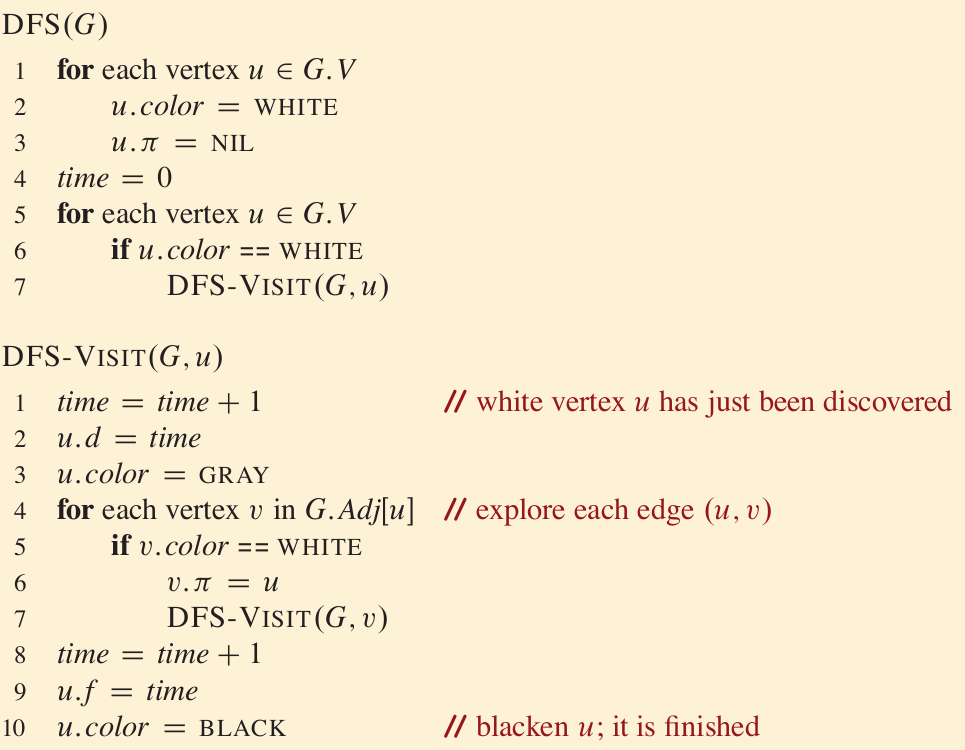


Explicação em vídeo: https://www.youtube.com/watch?v=D-z-p8D2fPE&list=PL7OlISixQYm50wMkXCygCgymn1dVmc9sg&index=32

Note que a Busca em Profundidade inicia definindo o status de cada vértice como WHITE e a variável global time como zero. A principal diferença entre os algoritmos BFS e DFS é que enquanto o primeiro é mais focado em um aspecto espacial, pois minimiza os caminhos, o segundo é mais focado no aspecto temporal, uma vez que estamos interessados em calcular os tempos de entrada e saída de todo vértice do grafo.

A função DFS_visit é recursiva e a cada novo vértice descoberto é ativada, empilhando o novo vértice. Na entrada da função a variável time é incrementada e antes da saída também, pois não é possível entrar e sair de um vértice no mesmo tempo. Note que devido a pilha de recursão, o primeiro vértice visitado será o último a ser retirado da pilha.

A seguir iremos realizar o trace completo do algoritmo da Busca em Profundidade.

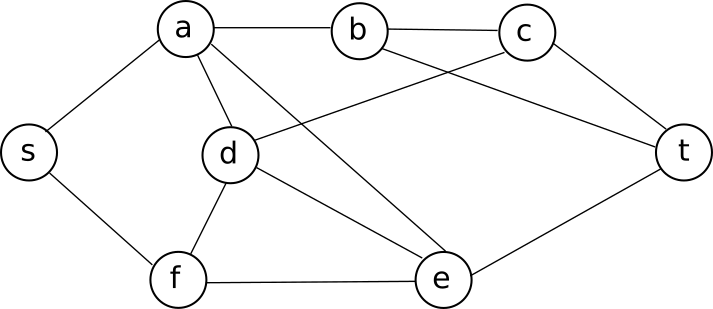

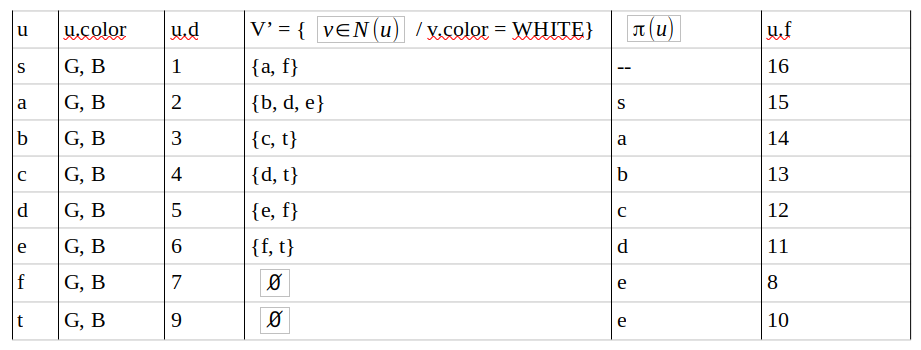

Explicação em vídeo: https://www.youtube.com/watch?v=IqhfudQDnGI&list=PL7OlISixQYm50wMkXCygCgymn1dVmc9sg&index=33

###**Propriedades da DFS-tree**

1) A rotulação tem o seguinte significado:

a) [u.d, u.f] $\subset$ [v.d, v.f]: u é descendente de v

b) [v.d, v.f] $\subset$ [u.d, u.f]: v é descendente de u

c) [v.d, v.f] e [u.d, u.f] são disjuntos: estão em ramos distintos da árvore

2) Após a DFS, podemos classificar as arestas de G como:

a) t_edges (tree_edges): $e \in T$ 

b) b_edges (backward edges): $e \notin T$ (atalhos que nos permitem voltar)

A seguir veremos um resultado muito interessante que determina como podemos encontrar vértices de corte em grafos. Um vértice v é considerado vértice de corte se a sua remoção desconecta o grafo.

**Teorema:** Seja G = (V, E) um grafo conexo. Então, v é um vértice de corte se e somente se v tem um filho s tal que não existe backward edge ligando s ou qualquer descendente de s a um ancestral de v.

Considere o grafo a seguir, em que a Busca em Profundidade foi aplicada com raiz no vértice a. Note que em todos os vértices temos os tempos de entrada e saída. Com isso, é possível determinar que são os descendentes de um dado vértice qualquer.

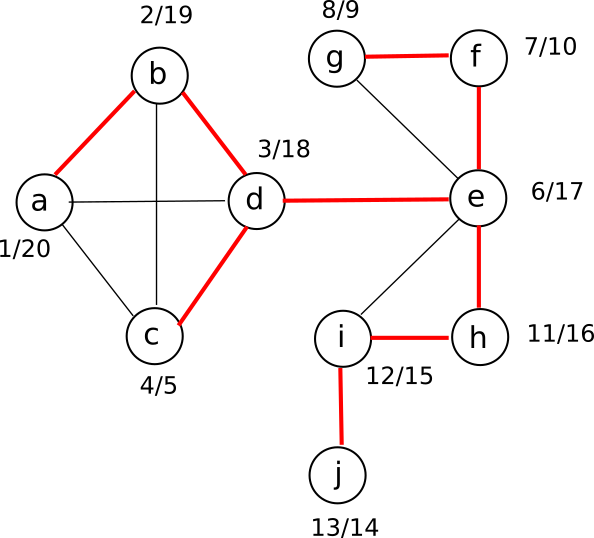




De posse da rotulação do algoritmo DFS, pergunta-se:

1. b é vértice de corte? Não, pois backward edge (a, d) liga um sucessor a um antecessor (atalho)

2. d é vértice de corte? Sim, pois não há backward edge entre antecessor e sucessor

3. e é vértice de corte? Sim, pois não há backward edge entre antecessor e sucessor

Explicação em vídeo: https://www.youtube.com/watch?v=0sn9eCMDqRE&list=PL7OlISixQYm50wMkXCygCgymn1dVmc9sg&index=34

###**Ordenação Topológica**

É uma aplicação muito importante em computação. Exemplos de aplicações da ordenação topológica incluem a resolução de dependências entre bibliotecas de software, bem como gerenciamento de projetos e escalonamento de processos.

A ordenação topológica requer uma classe particular de grafos: DAG’s (directed acyclic graphs, ou grafos direcionados acíclicos)

**Def:** A ordenação topológica de um DAG G = (V, E) é uma ordenação linear de modo que se $(u, v) \in E$ então u aparece antes de v

Algoritmo: TopSort(G)
1. Executar DFS(G) 
2. Conforme cada vértice é finalizado (BLACK), insira-o no início de uma lista L
3. Retorne a lista L

O exemplo a seguir ilustra esse processo. Suponha que o DAG abaixo represente as dependências entre os processos, ou seja se existe uma aresta (u, v), significa que antes de v ser executado, é preciso que u seja executado antes.

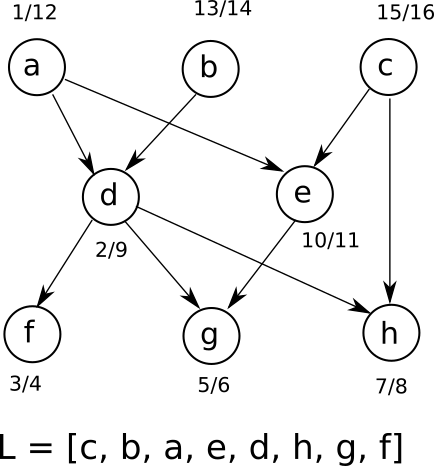

Note que os vértices são ordenados de acordo com o tempo de saída e não o tempo de entrada.

Explicação em vídeo: https://www.youtube.com/watch?v=Gpw1FWBjj0U&list=PL7OlISixQYm50wMkXCygCgymn1dVmc9sg&index=35 

A seguir apresentamos uma implementação em Python do algoritmo da Busca em Largura utilizando a biblioteca NetworkX para criar e manipular grafos.

Plotando grafo...


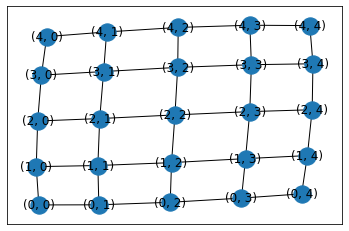

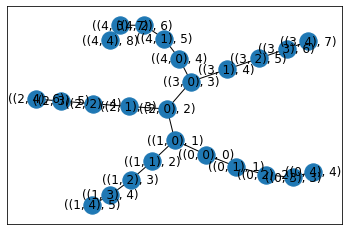

In [ ]:
# Adiciona bibliotecas auxiliares
import networkx as nx
import matplotlib.pyplot as plt
from collections import deque

def bfs(G, s):
    
    # dicionário para armazenar o mapa de predecessores
    P = {} # estrutura de dados que mapeia uma chave a um valor
    # inicialização do algoritmo 
    for v in G.nodes():
        G.nodes[v]['color'] = 'white'
        G.nodes[v]['lambda'] = float('inf')
    
    # iniciar cor da raiz como cinza
    G.nodes[s]['color'] = 'gray'
    # custo para a raiz é 0
    G.nodes[s]['lambda'] = 0
    # iniciar fila Q vazia
    Q = deque()
    # inserir nó raiz no início da fila
    Q.append(s)
    
    # enquanto fila não estiver vazia
    while (len(Q) > 0):
        # obter o primeiro elemento da fila
        u = Q.popleft()
        # para cada vertice adjacênte a u
        for v in G.neighbors(u):
            # se v é branco
            if (G.nodes[v]['color'] == 'white'):
                # atualizar custo de v
                G.nodes[v]['lambda'] = G.nodes[u]['lambda'] + 1
                # adicionar u como antecessor de v
                P[v] = u
                # atualizar cor de v
                G.nodes[v]['color'] = 'gray'
                # incluir v em  Q
                Q.append(v)
        
        # atualizar cor de u
        G.nodes[u]['color'] = 'black'
    
    # retorna a lista de antecessores
    return P


if __name__ == '__main__':
    # Cria um grafo de exemplo
    G = nx.grid_2d_graph(5, 5)

    print('Plotando grafo...')
    # Cria figura para plotagem do grafo
    plt.figure(1)
    # Há vários layouts, mas spring é um dos mais bonitos
    nx.draw_networkx(G, pos=nx.spring_layout(G), with_labels=True)
    # Exibir figura
    plt.show()

    # Aplicando Busca em Largura
    P = bfs(G, (0, 0))      # retorna as arestas que compõem a BFS_tree
    # Cria um grafo vazio para árvore da busca em largura
    T = nx.Graph()
    # Inserir arestas retornadas pelo algoritmo em T
    T.add_edges_from([ (u, v) for u, v in P.items() ])
    # Armazena as distâncias em um dicionário (lambda de cada vértice)
    dist = { v: (v, data['lambda']) for v, data in G.nodes(data=True) }

    # Cria figura para plotagem da árvore
    plt.figure(2) 
    # Define o layout
    pos = nx.spring_layout(T)
    # Plotar vertices de T
    nx.draw_networkx_nodes(T, pos)
    # Plotar distâncias
    nx.draw_networkx_labels(T, pos, labels=dist)
    # Plotar arestas de T
    nx.draw_networkx_edges(T, pos)
    # Exibir figura
    plt.show()

"The real voyage of discovery consists not in seeking new landscapes, but in having new eyes." (Marcel Proust)